# Recognizing MNIST handwritten digits using KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [2]:
# Load digit dataset

X, y = datasets.load_digits(return_X_y=True)
y = y.reshape((-1, 1))

print(X.shape, y.shape)

(1797, 64) (1797, 1)


digit = [0]


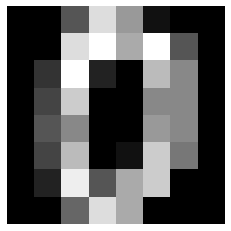

In [3]:
# Visualize the dataset

def drawImg(img, label):
    print('digit =', label)
    plt.imshow(img.reshape((8, 8)), cmap='gray')
    plt.axis('off')
    plt.show()

drawImg(X[0], y[0])

In [4]:
# Split dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1437, 64) (1437, 1)
(360, 64) (360, 1)


In [5]:
# K-Nearest Neighbors algorithm

# Euclidean distance
def dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def knn_predict(X, y, query_x, k = 5):
    vals = []
    
    for i in range(X.shape[0]):
        d = dist(X[i], query_x)
        vals.append((d, y[i]))
    
    vals = sorted(vals)
    vals = np.array(vals[:k])
    
    vals = np.unique(vals[:, 1], return_counts=True)
    ind = np.argmax(vals[1])
    pred = vals[0][ind]
    
    return int(pred)

pred = 6
digit = [6]


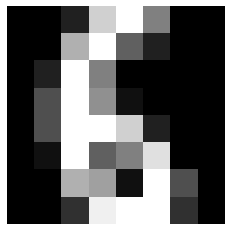

In [6]:
# Make predctions
p = knn_predict(X_train, y_train, X_test[0], k = 7)

print('pred =', p)
drawImg(X_test[0], y_test[0])

In [7]:
# Predicting on test data and computing accuracy

m = X_test.shape[0]
acc = 0
for i in range(m):
    p = knn_predict(X_train, y_train, X_test[i])
    acc += p==y_test[i]

acc = acc/m
print('accuracy =', acc)

accuracy = [0.98888889]
